# **Data Loading and EDA**

## Countries: China, USA, Brazil, Indonesia
## Crops: Rice, Wheat, Corn, Soya Beans
## Year: 2000-2021


In [1]:
import pandas as pd

In [2]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Crop_Production

In [3]:
Crop_Production_df = pd.read_csv("Crop_Production.csv")
Crop_Production_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Crop_Production_df = Crop_Production_df[Crop_Production_df['Year'].between(2000, 2021)]
Crop_Production_df.rename(columns={'Element': 'Prod_type', 'Item': 'Crop_Name', 'Value': 'Crop_Production_Value',
                                   'Unit': 'Crop_Production_Unit'}, inplace=True)

Crop_Production_df.head()

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value
0,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0
1,Brazil,Yield,Maize (corn),2000,100 g/ha,27182.0
2,Brazil,Production,Maize (corn),2000,t,32321000.0
3,Brazil,Area harvested,Maize (corn),2001,ha,12335175.0
4,Brazil,Yield,Maize (corn),2001,100 g/ha,34019.0


In [4]:
Crop_Production_df.shape

(990, 6)

In [5]:
unique_values = Crop_Production_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [6]:
null_values_count = Crop_Production_df.isnull().sum()
print(null_values_count)

Area                     0
Prod_type                0
Crop_Name                0
Year                     0
Crop_Production_Unit     0
Crop_Production_Value    0
dtype: int64


Text(0.5, 1.0, 'Crop Production Area by Crop')

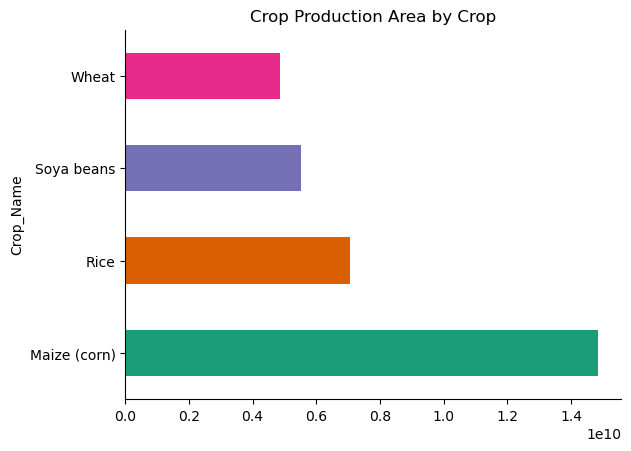

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
Crop_Production_df.groupby('Crop_Name')['Crop_Production_Value'].sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Crop Production Area by Crop")

Text(0.5, 1.0, 'Crop Production Area by Country')

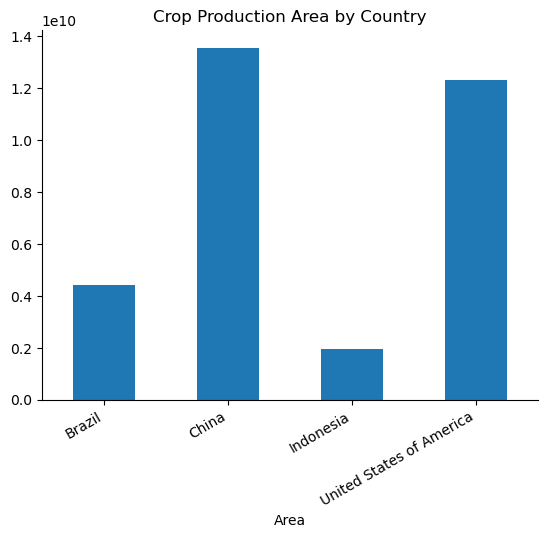

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
Crop_Production_df.groupby('Area')['Crop_Production_Value'].sum().plot(kind='bar')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xticks(rotation=30, ha='right')
plt.title("Crop Production Area by Country")

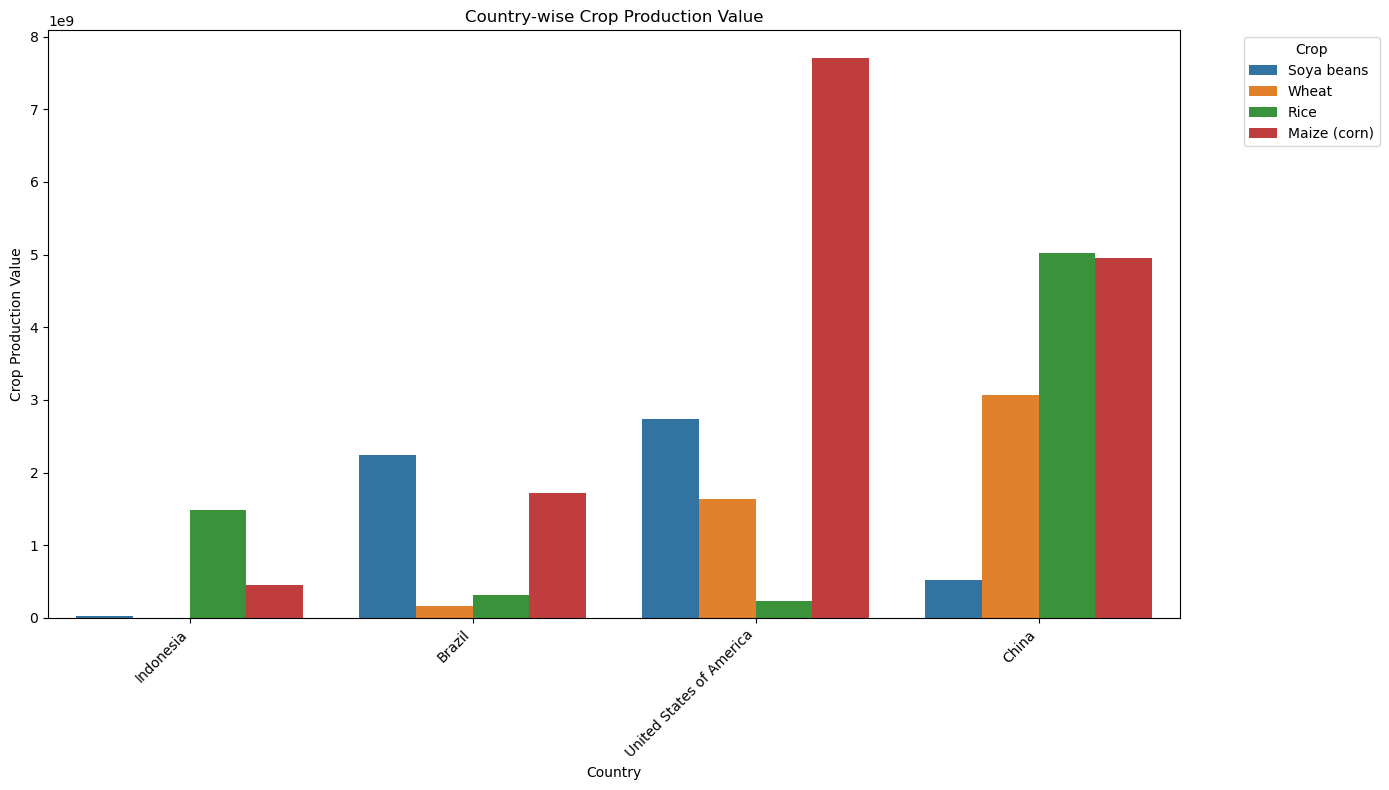

In [9]:
# Grouping by 'Area' (country) and 'Crop_Name', and summing up the 'Crop_Production_Value' for each country and crop
country_crop_production = Crop_Production_df.groupby(['Area', 'Crop_Name'])['Crop_Production_Value'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=country_crop_production.sort_values(by='Crop_Production_Value', ascending=True), x='Area', y='Crop_Production_Value', hue='Crop_Name')
plt.title('Country-wise Crop Production Value')
plt.xlabel('Country')
plt.ylabel('Crop Production Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Crop_Trade

In [10]:
Crop_Trade_df = pd.read_csv("Crop_Trade.csv")
Crop_Trade_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Crop_Trade_df = Crop_Trade_df[Crop_Trade_df['Year'].between(2000, 2021)]
Crop_Trade_df.rename(columns={'Element': 'Trade_type', 'Item': 'Crop_Name', 'Value': 'Trade_Value',  'Unit': 'Trade_Unit'}, inplace=True)

Crop_Trade_df.head()

,Area,Trade_type,Crop_Name,Year,Trade_Unit,Trade_Value
0,Brazil,Import Quantity,Maize (corn),2000,t,1771194.0
1,Brazil,Import Value,Maize (corn),2000,1000 USD,201960.0
2,Brazil,Export Quantity,Maize (corn),2000,t,6699.0
3,Brazil,Export Value,Maize (corn),2000,1000 USD,9366.0
4,Brazil,Import Quantity,Maize (corn),2001,t,624362.0


In [11]:
Crop_Trade_df.shape

(1404, 6)

In [12]:
Crop_Trade_df.columns

Index(['Area', 'Trade_type', 'Crop_Name', 'Year', 'Trade_Unit', 'Trade_Value'], dtype='object')

In [13]:
unique_values = Crop_Trade_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [14]:
null_values_count = Crop_Trade_df.isnull().sum()
print(null_values_count)

Area           0
Trade_type     0
Crop_Name      0
Year           0
Trade_Unit     0
Trade_Value    0
dtype: int64


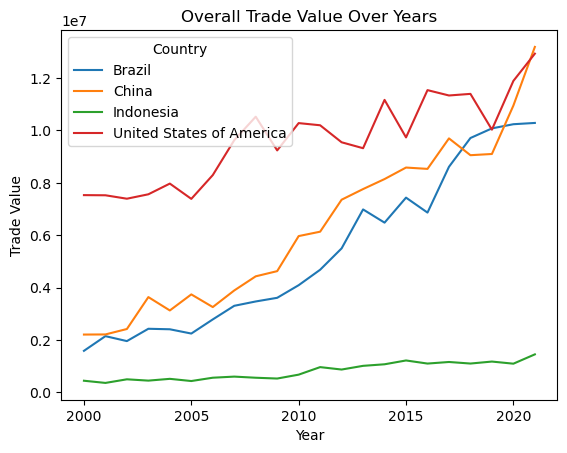

In [15]:
sns.lineplot(data=Crop_Trade_df, x='Year', y='Trade_Value', hue='Area', ci=None)
plt.title('Overall Trade Value Over Years')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.legend(title='Country')
plt.show()

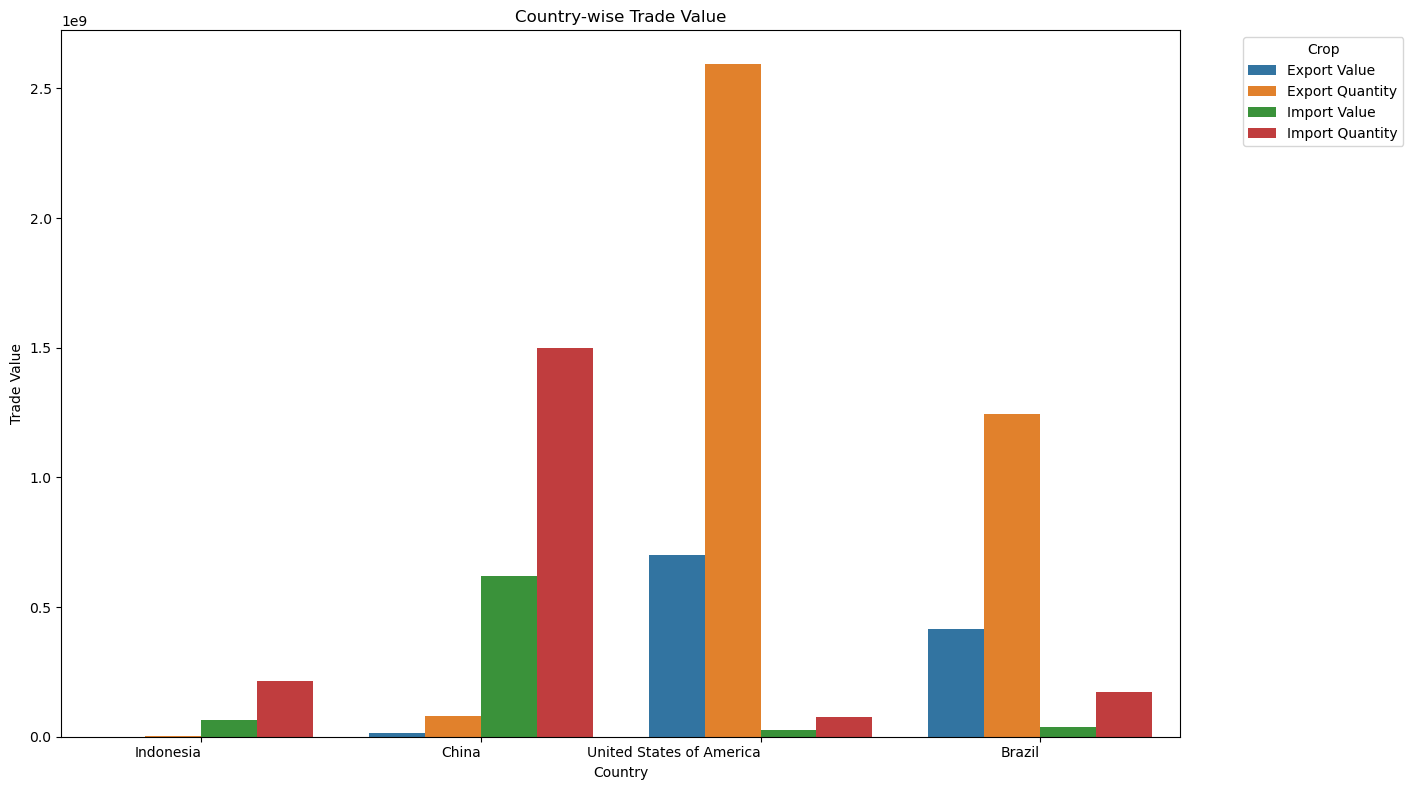

In [16]:
# Grouping by 'Area' (country) and 'Crop_Name', and summing up the 'Crop_Production_Value' for each country and crop
country_crop_production = Crop_Trade_df.groupby(['Area', 'Trade_type'])['Trade_Value'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=country_crop_production.sort_values(by='Trade_Value', ascending=True), x='Area', y='Trade_Value', hue='Trade_type')
plt.title('Country-wise Trade Value')
plt.xlabel('Country')
plt.ylabel('Trade Value')
plt.xticks(rotation=360, ha='right')
plt.tight_layout()
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')

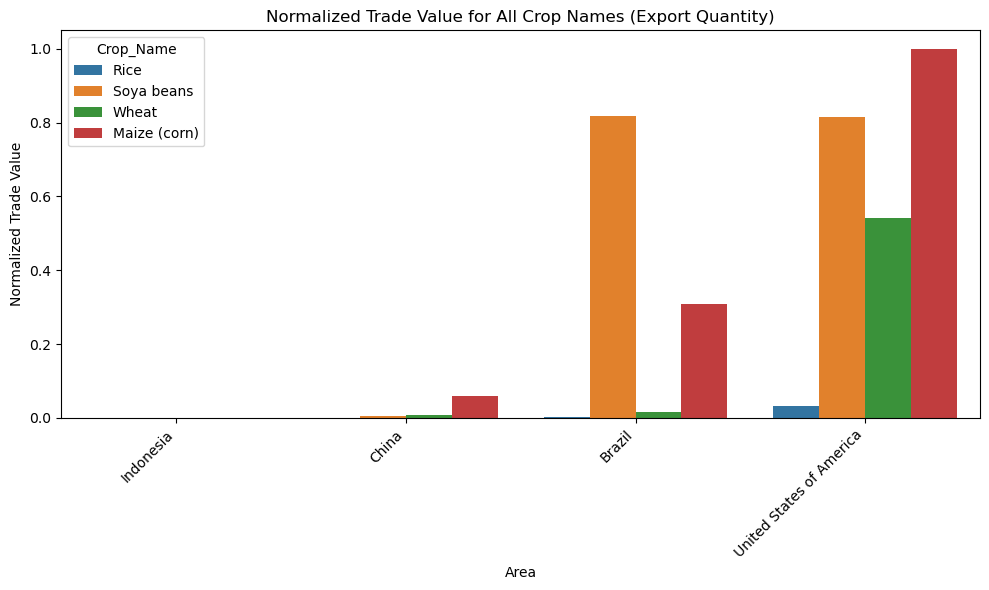

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Filter the DataFrame for Trade_Type = 'Export Quantity'
export_df = Crop_Trade_df[Crop_Trade_df['Trade_type'] == 'Export Quantity']

# Group by Area and Crop_Name and calculate the sum of Trade_Value
grouped_df = export_df.groupby(['Area', 'Crop_Name'])['Trade_Value'].sum().reset_index()

# Normalize the Trade_Value column
scaler = MinMaxScaler()
grouped_df['Trade_Value_Normalized'] = scaler.fit_transform(grouped_df['Trade_Value'].values.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df.sort_values(by='Trade_Value_Normalized', ascending=True), x='Area', y='Trade_Value_Normalized', hue='Crop_Name')
plt.title('Normalized Trade Value for All Crop Names (Export Quantity)')
plt.xlabel('Area')
plt.ylabel('Normalized Trade Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Emission_from_Crops

In [18]:
Emission_from_Crops_df = pd.read_csv("Emission_from_Crops.csv")
Emission_from_Crops_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Source', 'Source Code',
                    'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Emission_from_Crops_df.rename(columns={'Element': 'Emission_type', 'Item': 'Crop_Name', 'Value': 'Emission_Value',  'Unit': 'Emission_Unit'}, inplace=True)

Emission_from_Crops_df.head()

,Area,Emission_type,Crop_Name,Year,Emission_Unit,Emission_Value
0,Brazil,Crops total (Emissions N2O),Maize (corn),2000,kt,6.4353
1,Brazil,Crops total (Emissions CH4),Maize (corn),2000,kt,32.1040
2,Brazil,Crops total (Emissions N2O),Maize (corn),2001,kt,7.8851
3,Brazil,Crops total (Emissions CH4),Maize (corn),2001,kt,33.3050
4,Brazil,Crops total (Emissions N2O),Maize (corn),2002,kt,6.9347


In [19]:
Emission_from_Crops_df.shape

(572, 6)

In [20]:
unique_values = Emission_from_Crops_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [21]:
null_values_count = Emission_from_Crops_df.isnull().sum()
print(null_values_count)

Area              0
Emission_type     0
Crop_Name         0
Year              0
Emission_Unit     0
Emission_Value    0
dtype: int64


## Land_Use

In [22]:
Land_Use_df = pd.read_csv("Land_Use.csv")
Land_Use_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element',
                    'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Land_Use_df.rename(columns={'Item': 'Area_type', 'Value': 'Area_Value',  'Unit': 'Area_Unit'}, inplace=True)

Land_Use_df.head()

,Area,Area_type,Year,Area_Unit,Area_Value
0,Brazil,Land area,2000,1000 ha,835814.0
1,Brazil,Land area,2001,1000 ha,835814.0
2,Brazil,Land area,2002,1000 ha,835814.0
3,Brazil,Land area,2003,1000 ha,835814.0
4,Brazil,Land area,2004,1000 ha,835814.0


In [23]:
Land_Use_df.shape

(176, 5)

In [24]:
unique_values = Land_Use_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [25]:
null_values_count = Land_Use_df.isnull().sum()
print(null_values_count)

Area          0
Area_type     0
Year          0
Area_Unit     0
Area_Value    0
dtype: int64


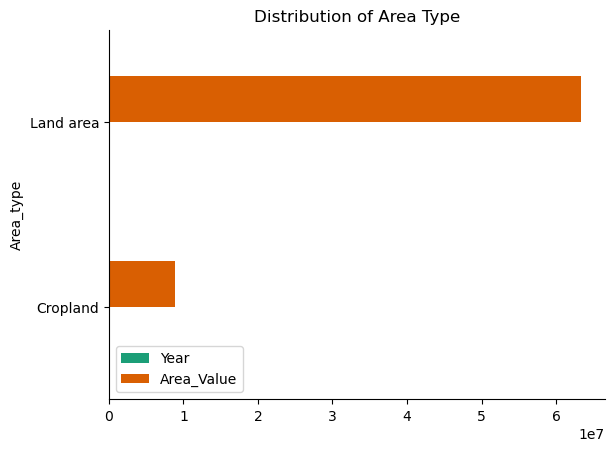

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
Land_Use_df.groupby('Area_type').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Distribution of Area Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Pesticides_Use

In [27]:
Pesticides_Use_df = pd.read_csv("Pesticides_Use.csv")
Pesticides_Use_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element',
                    'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Pesticides_Use_df.rename(columns={'Item': 'Pesticide_Type', 'Value': 'Pesticide_Value',  'Unit': 'Pesticide_Unit'}, inplace=True)

Pesticides_Use_df.head()

,Area,Pesticide_Type,Year,Pesticide_Unit,Pesticide_Value
0,Brazil,Pesticides (total),2000,t,141130.0
1,Brazil,Pesticides (total),2001,t,152271.0
2,Brazil,Pesticides (total),2002,t,146264.0
3,Brazil,Pesticides (total),2003,t,183340.0
4,Brazil,Pesticides (total),2004,t,215779.0


In [28]:
Pesticides_Use_df.shape

(264, 5)

In [29]:
unique_values = Pesticides_Use_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [30]:
null_values_count = Pesticides_Use_df.isnull().sum()
print(null_values_count)

Area               0
Pesticide_Type     0
Year               0
Pesticide_Unit     0
Pesticide_Value    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

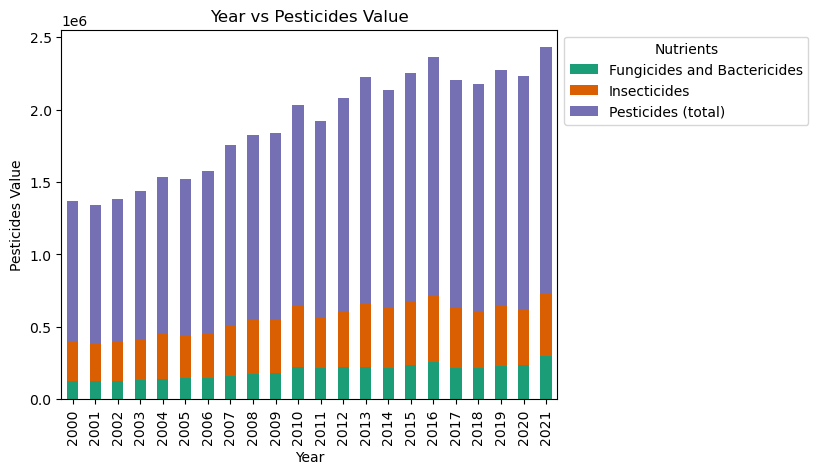

In [31]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Grouping the data by year and nutrients and summing the values
df_grouped = Pesticides_Use_df.groupby(['Year', 'Pesticide_Type'])['Pesticide_Value'].sum().unstack()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Pesticides Value')
plt.title('Year vs Pesticides Value')
plt.legend(title='Nutrients', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

<Figure size 1000x600 with 0 Axes>

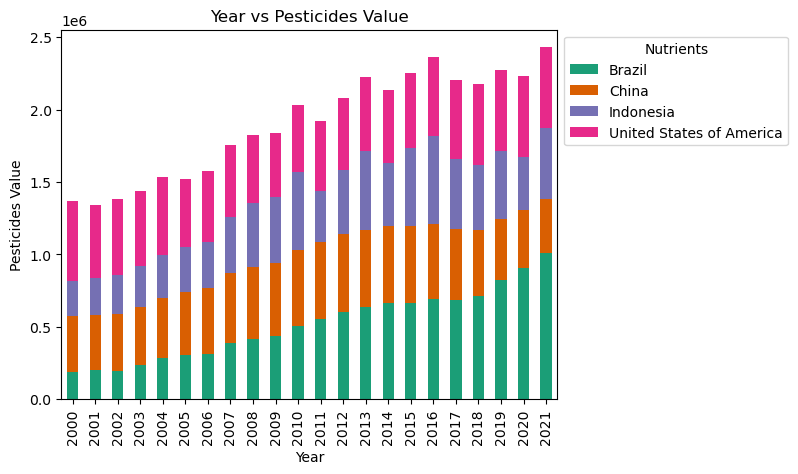

In [32]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Grouping the data by year and nutrients and summing the values
df_grouped = Pesticides_Use_df.groupby(['Year', 'Area'])['Pesticide_Value'].sum().unstack()

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Pesticides Value')
plt.title('Year vs Pesticides Value')
plt.legend(title='Nutrients', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

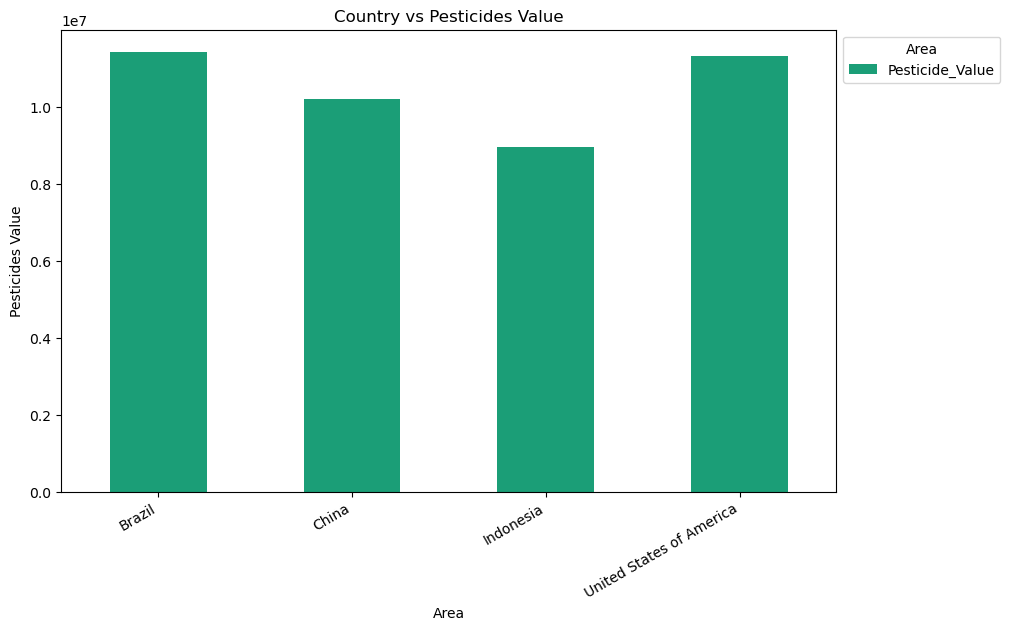

In [33]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Grouping the data by area and summing the values
df_grouped = Pesticides_Use_df.groupby('Area')['Pesticide_Value'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
df_grouped.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Pesticides Value')
plt.title('Country vs Pesticides Value')
plt.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Value_of_Agricultural_production

In [34]:
Value_of_Agricultural_production_df = pd.read_csv("Value_of_Agricultural_Production.csv")
Value_of_Agricultural_production_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description'], axis=1,inplace=True)
Value_of_Agricultural_production_df = Value_of_Agricultural_production_df[Value_of_Agricultural_production_df['Year'].between(2000, 2021)]
Value_of_Agricultural_production_df.rename(columns={'Item': 'Crop_Name', 'Value': 'Agri_Prod_Value',  'Unit': 'Agri_Prod_Unit'}, inplace=True)
Value_of_Agricultural_production_df.head()

,Area,Element,Crop_Name,Year,Agri_Prod_Unit,Agri_Prod_Value
0,Brazil,Gross Production Value (current thousand US$),Maize (corn),2000,1000 USD,3568843
1,Brazil,Gross Production Value (current thousand US$),Maize (corn),2001,1000 USD,2911084
2,Brazil,Gross Production Value (current thousand US$),Maize (corn),2002,1000 USD,3209618
3,Brazil,Gross Production Value (current thousand US$),Maize (corn),2003,1000 USD,4973278
4,Brazil,Gross Production Value (current thousand US$),Maize (corn),2004,1000 USD,4321472


In [35]:
Value_of_Agricultural_production_df.shape

(317, 6)

In [36]:
unique_values = Value_of_Agricultural_production_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2018 2019 2020 2021 2017]


In [37]:
null_values_count = Value_of_Agricultural_production_df.isnull().sum()
print(null_values_count)

Area               0
Element            0
Crop_Name          0
Year               0
Agri_Prod_Unit     0
Agri_Prod_Value    0
dtype: int64


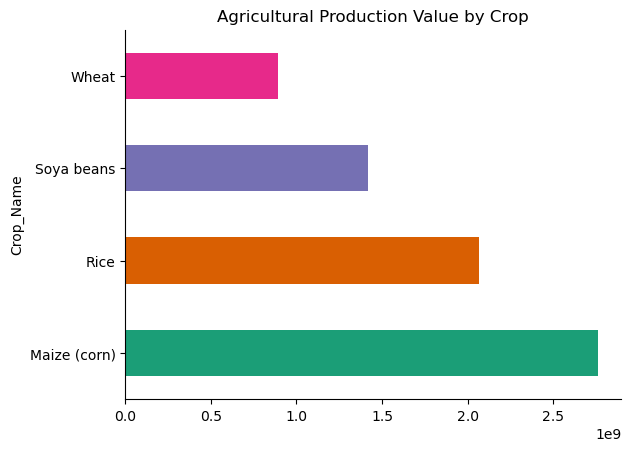

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
Value_of_Agricultural_production_df.groupby('Crop_Name')['Agri_Prod_Value'].sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Agricultural Production Value by Crop")
plt.gca().spines[['top', 'right',]].set_visible(False)

## Merging the Data

In [39]:
merged_df = pd.merge(Crop_Production_df, Crop_Trade_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Emission_from_Crops_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Value_of_Agricultural_production_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df, Land_Use_df, on=['Area', 'Year'], how='inner')
merged_df = pd.merge(merged_df,Pesticides_Use_df, on=['Area', 'Year'], how='inner')

In [40]:
merged_df.head(2)

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Trade_type,Trade_Unit,Trade_Value,Emission_type,...,Emission_Value,Element,Agri_Prod_Unit,Agri_Prod_Value,Area_type,Area_Unit,Area_Value,Pesticide_Type,Pesticide_Unit,Pesticide_Value
0,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0,Import Quantity,t,1771194.0,Crops total (Emissions N2O),...,6.4353,Gross Production Value (current thousand US$),1000 USD,3568843,Land area,1000 ha,835814.0,Pesticides (total),t,141130.0
1,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0,Import Quantity,t,1771194.0,Crops total (Emissions N2O),...,6.4353,Gross Production Value (current thousand US$),1000 USD,3568843,Land area,1000 ha,835814.0,Insecticides,t,28382.0


In [41]:
merged_df.columns

Index(['Area', 'Prod_type', 'Crop_Name', 'Year', 'Crop_Production_Unit',
       'Crop_Production_Value', 'Trade_type', 'Trade_Unit', 'Trade_Value',
       'Emission_type', 'Emission_Unit', 'Emission_Value', 'Element',
       'Agri_Prod_Unit', 'Agri_Prod_Value', 'Area_type', 'Area_Unit',
       'Area_Value', 'Pesticide_Type', 'Pesticide_Unit', 'Pesticide_Value'],
      dtype='object')

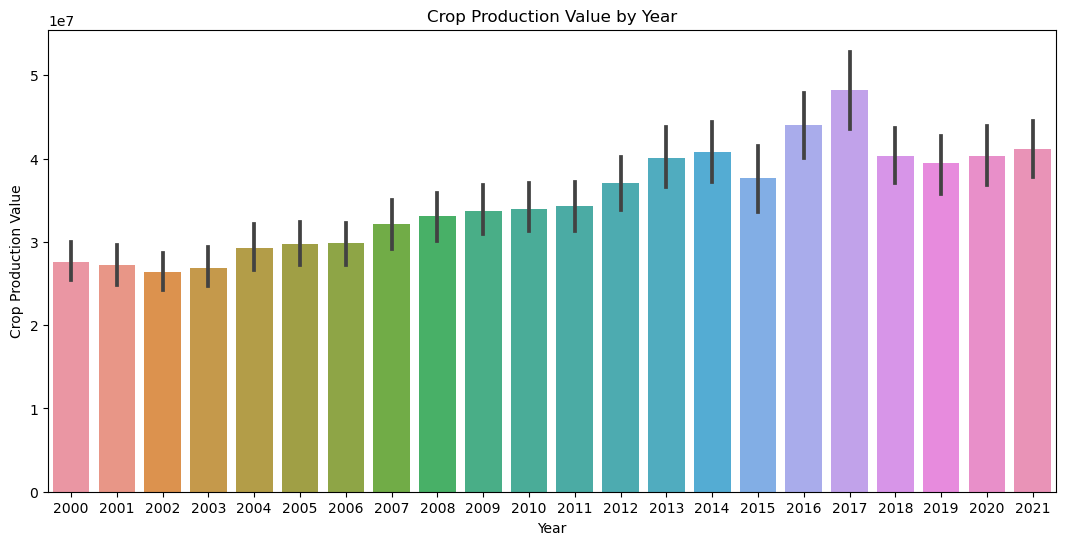

In [42]:
plt.figure(figsize=(13, 6))
sns.barplot(data=merged_df, x='Year', y='Crop_Production_Value')
plt.title('Crop Production Value by Year')
plt.xlabel('Year')
plt.ylabel('Crop Production Value')
plt.show()


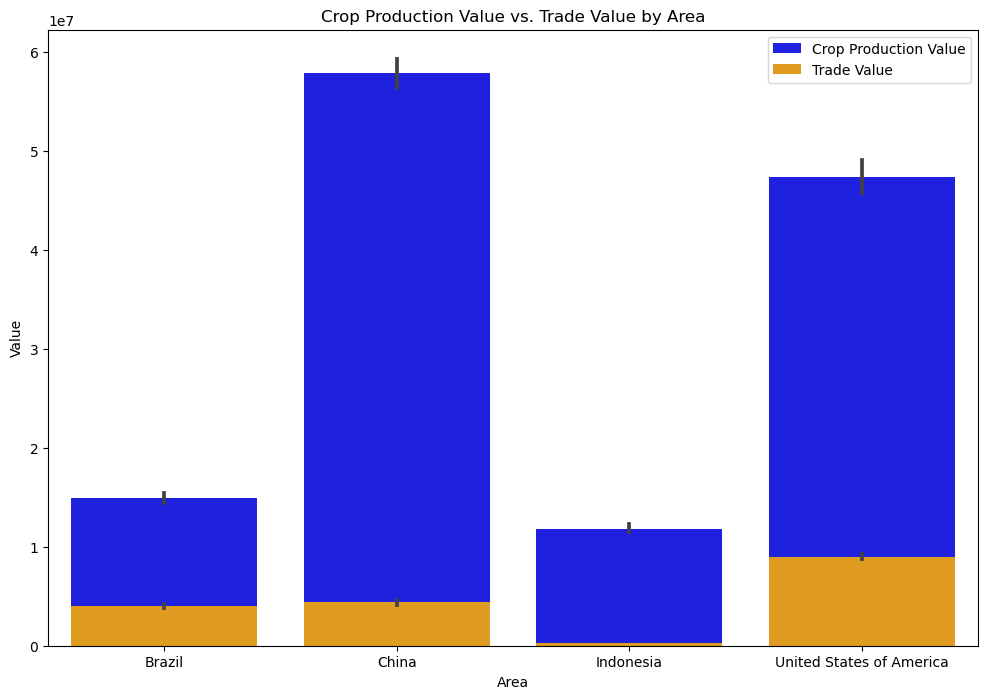

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='Area', y='Crop_Production_Value', color='blue', label='Crop Production Value')
sns.barplot(data=merged_df, x='Area', y='Trade_Value', color='orange', label='Trade Value')
plt.title('Crop Production Value vs. Trade Value by Area')
plt.xlabel('Area')
plt.ylabel('Value')
plt.legend()
plt.show()

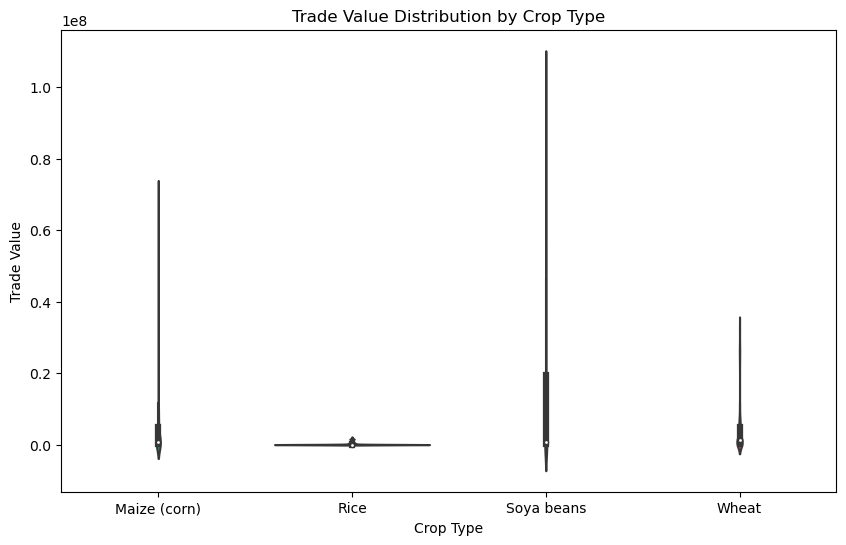

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x='Crop_Name', y='Trade_Value')
plt.title('Trade Value Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Trade Value')
plt.show()


In [45]:
merged_df = pd.merge(Crop_Production_df, Crop_Trade_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Emission_from_Crops_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Value_of_Agricultural_production_df, on=['Area', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df, Land_Use_df, on=['Area', 'Year'], how='inner')
merged_df = pd.merge(merged_df,Pesticides_Use_df, on=['Area', 'Year'], how='inner')

In [46]:
merged_df.head(2)

,Area,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value,Trade_type,Trade_Unit,Trade_Value,Emission_type,...,Emission_Value,Element,Agri_Prod_Unit,Agri_Prod_Value,Area_type,Area_Unit,Area_Value,Pesticide_Type,Pesticide_Unit,Pesticide_Value
0,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0,Import Quantity,t,1771194.0,Crops total (Emissions N2O),...,6.4353,Gross Production Value (current thousand US$),1000 USD,3568843,Land area,1000 ha,835814.0,Pesticides (total),t,141130.0
1,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0,Import Quantity,t,1771194.0,Crops total (Emissions N2O),...,6.4353,Gross Production Value (current thousand US$),1000 USD,3568843,Land area,1000 ha,835814.0,Insecticides,t,28382.0


In [47]:
merged_df.shape

(39384, 21)

In [48]:
merged_df.columns

Index(['Area', 'Prod_type', 'Crop_Name', 'Year', 'Crop_Production_Unit',
       'Crop_Production_Value', 'Trade_type', 'Trade_Unit', 'Trade_Value',
       'Emission_type', 'Emission_Unit', 'Emission_Value', 'Element',
       'Agri_Prod_Unit', 'Agri_Prod_Value', 'Area_type', 'Area_Unit',
       'Area_Value', 'Pesticide_Type', 'Pesticide_Unit', 'Pesticide_Value'],
      dtype='object')

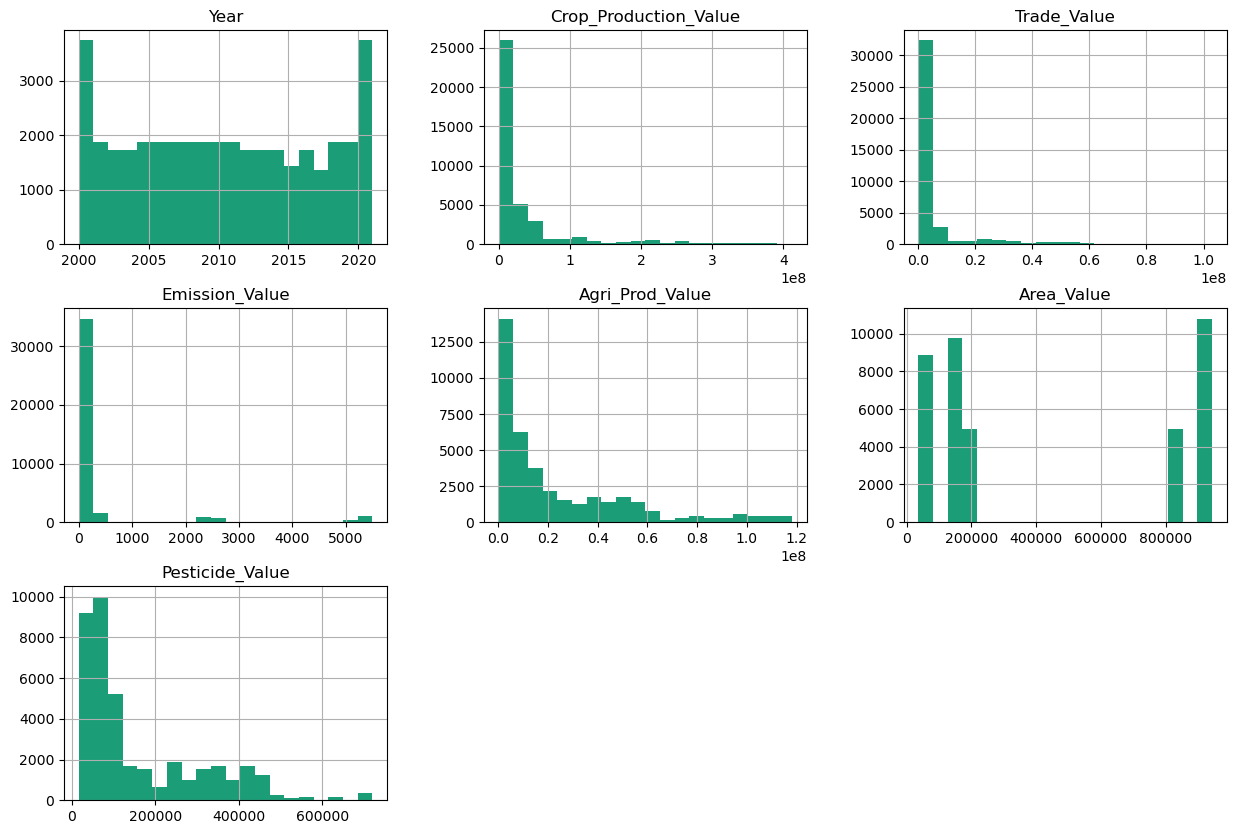

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['Year', 'Crop_Production_Value', 'Trade_Value', 'Emission_Value', 'Element', 'Agri_Prod_Value', 'Area_type', 'Area_Value','Pesticide_Value']
merged_df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.show()

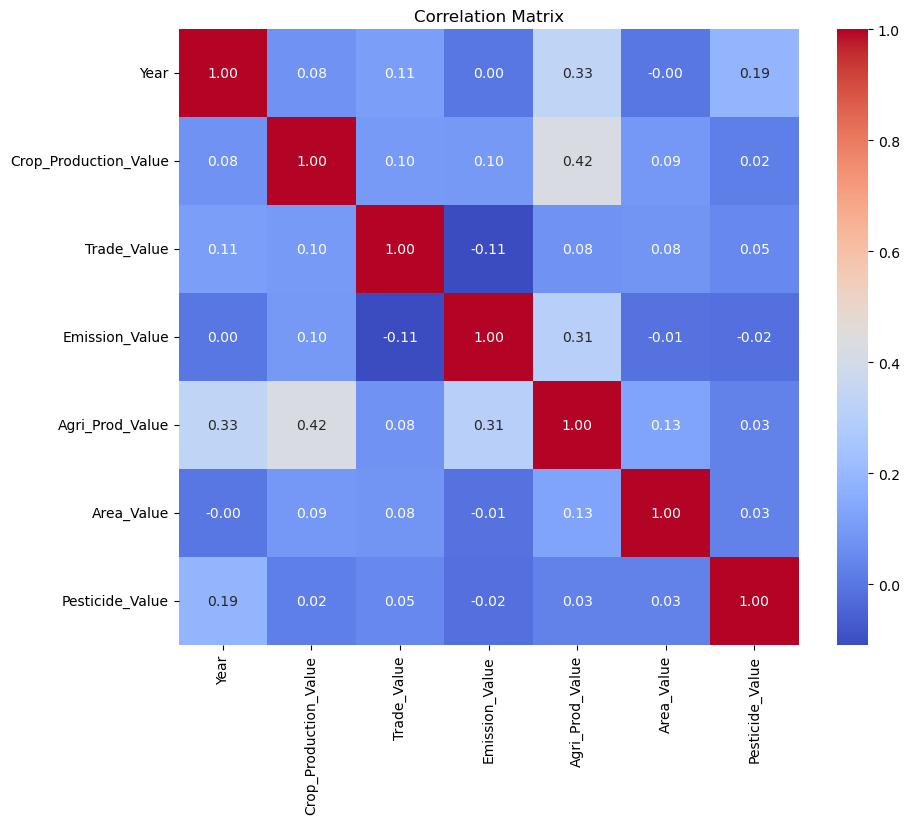

In [50]:
# Correlation matrix
correlation_matrix = merged_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

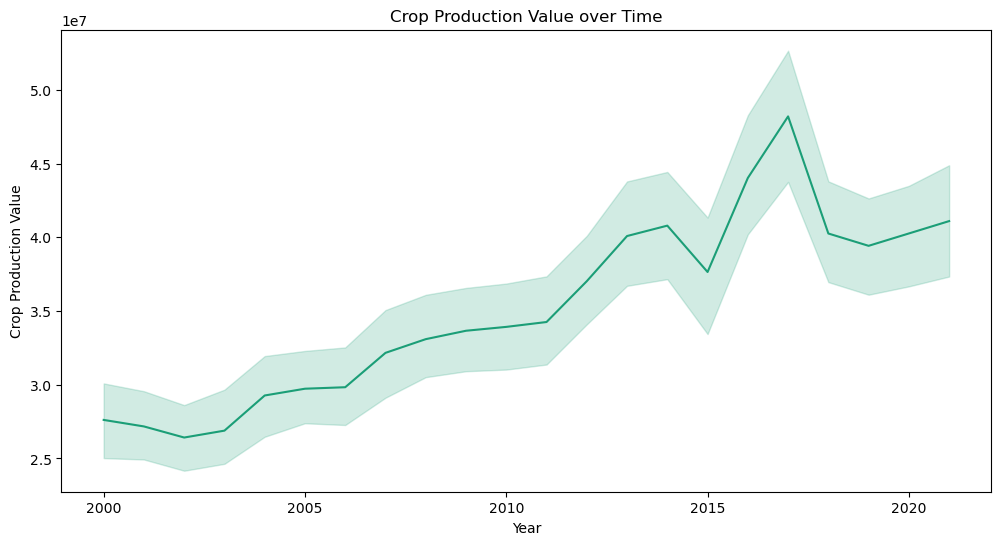

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Year', y='Crop_Production_Value')
plt.xlabel('Year')
plt.ylabel('Crop Production Value')
plt.title('Crop Production Value over Time')
plt.show()

## Model Building

In [72]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [53]:
feature_cols = ['Area', 'Prod_type', 'Crop_Name', 'Year', 'Emission_type', 'Emission_Value', 'Area_type', 'Pesticide_Type', 'Pesticide_Value', 'Area_Value']
target_col = 'Crop_Production_Value'

In [54]:
# Splitting the dataset into training and test sets
# Filtering the dataset for training and testing
train_data = merged_df[merged_df['Year'] <= 2018]
test_data = merged_df[merged_df['Year'] > 2018]

In [55]:
X_train = train_data[feature_cols]
y_train = train_data[target_col]
X_test = test_data[feature_cols]
y_test = test_data[target_col]

In [57]:
# Creating a preprocessing pipeline for the numerical features
numerical_cols = ['Year', 'Area_Value', 'Emission_Value', 'Pesticide_Value']  
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [58]:
# Creating a preprocessing pipeline for the categorical features
categorical_cols = ['Area', 'Prod_type', 'Crop_Name', 'Emission_type', 'Area_type', 'Pesticide_Type']  
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [62]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [85]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## **Crop Production Prediction - Linear Regression**

In [81]:
# linear regression model
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])


In [82]:
linear_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Area_Value',
                                                   'Emission_Value',
                                                   'Pesticide_Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'Prod_type',
                                                   'Crop_Name', 'Emission_type',
                                                   'Area_type',
                                                   'Pesticide_Type'])])),
                ('regressor', LinearRegression())])

In [102]:
# Making predictions and evaluating the model
linear_y_pred = linear_model.predict(X_test)

In [106]:
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_mae_percentage = (linear_mae / np.mean(y_test)) * 100
print("Mean Absolute Error (MAE): {:.2f}%".format(linear_mae_percentage))

# Mean Squared Error (MSE)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_mse_percentage = (linear_mse / (np.mean(y_test) ** 2)) * 100
print("Mean Squared Error (MSE): {:.2f}%".format(linear_mse_percentage))

# Root Mean Squared Error (RMSE)
linear_rmse = np.sqrt(linear_mse)
linear_rmse_percentage = (linear_rmse / np.mean(y_test)) * 100
print("Root Mean Squared Error (RMSE): {:.2f}%".format(linear_rmse_percentage))

Mean Absolute Error (MAE): 92.13%
Mean Squared Error (MSE): 193.99%
Root Mean Squared Error (RMSE): 139.28%


## Crop Production Prediction - Random Forest

In [93]:
# Create a Random Forest model
rf = RandomForestRegressor(random_state=42)

In [94]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', rf)])

In [95]:
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [96]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [97]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Year',
                                                                          'Area_Value',
                                                                          'Emission_Value',
                                                                          'Pesticide_Value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Area',
                                                                          'Prod_type',
                                                                          'Crop_Name',
                                                                          'Emission_type',
                                                                          'Area_type',
                                                                          'Pesticide_Type'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 10, 20],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [98]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)

Best parameters found:  {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best score found:  2389645717360125.0


In [99]:
# Using the best parameters to create a new model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100,
                                         max_depth=None,
                                         min_samples_split=2,  # Updated parameter
                                         min_samples_leaf=4,
                                         random_state=42))
])

In [100]:
# Training the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Area_Value',
                                                   'Emission_Value',
                                                   'Pesticide_Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'Prod_type',
                                                   'Crop_Name', 'Emission_type',
                                                   'Area_type',
                                                   'Pesticide_Type'])])),
                ('regressor',
                 RandomForestRegressor(min_samples_leaf=4, random_state=42))])

In [104]:
# Making predictions and evaluating the model
rf_y_pred = rf_model.predict(X_test)

In [107]:
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mae_percentage = (rf_mae / np.mean(y_test)) * 100
print("Mean Absolute Error (MAE): {:.2f}%".format(rf_mae_percentage))

# Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mse_percentage = (rf_mse / (np.mean(y_test) ** 2)) * 100
print("Mean Squared Error (MSE): {:.2f}%".format(rf_mse_percentage))

# Root Mean Squared Error (RMSE)
rf_rmse = np.sqrt(rf_mse)
rf_rmse_percentage = (rf_rmse / np.mean(y_test)) * 100
print("Root Mean Squared Error (RMSE): {:.2f}%".format(rf_rmse_percentage))

Mean Absolute Error (MAE): 5.31%
Mean Squared Error (MSE): 1.89%
Root Mean Squared Error (RMSE): 13.74%


## Crop Production - Xgboost

In [108]:
import xgboost as xgb

In [109]:
# Create a pipeline with XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

In [110]:
# Training the model
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Area_Value',
                                                   'Emission_Value',
                                                   'Pesticide_Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Area', 'Prod_type',
                                                   'Crop_Name', 'Emission_type',
                                                   'Area_type',
                                                   'Pesticide_Type'])])),
                ('regressor',
                 XGBRe...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [113]:
# Making predictions
xgb_y_pred = xgb_pipeline.predict(X_test)

In [114]:
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mae_percentage = (xgb_mae / np.mean(y_test)) * 100
print("Mean Absolute Error (MAE): {:.2f}%".format(xgb_mae_percentage))

# Mean Squared Error (MSE)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_mse_percentage = (xgb_mse / (np.mean(y_test) ** 2)) * 100
print("Mean Squared Error (MSE): {:.2f}%".format(xgb_mse_percentage))

# Root Mean Squared Error (RMSE)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse_percentage = (xgb_rmse / np.mean(y_test)) * 100
print("Root Mean Squared Error (RMSE): {:.2f}%".format(xgb_rmse_percentage))

Mean Absolute Error (MAE): 9.72%
Mean Squared Error (MSE): 6.68%
Root Mean Squared Error (RMSE): 25.85%


## Trade Analysis - Linear Regression

In [115]:
df = merged_df[['Crop_Production_Value', 'Trade_type', 'Area','Trade_Value']]

X = df[['Crop_Production_Value', 'Trade_type', 'Area']]
y = df['Trade_Value']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [116]:
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean Absolute Error (MAE): {:.2f}%".format(mae_percentage))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse_percentage = (mse / (np.mean(y_test) ** 2)) * 100
print("Mean Squared Error (MSE): {:.2f}%".format(mse_percentage))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse_percentage = (rmse / np.mean(y_test)) * 100
print("Root Mean Squared Error (RMSE): {:.2f}%".format(rmse_percentage))

Mean Absolute Error (MAE): 134.43%
Mean Squared Error (MSE): 568.70%
Root Mean Squared Error (RMSE): 238.47%


## Trade Analysis - Random Forest

In [119]:
rf_TA_df = merged_df[['Crop_Production_Value', 'Trade_type', 'Area','Trade_Value']]

X = rf_TA_df[['Crop_Production_Value', 'Trade_type', 'Area']]
y = rf_TA_df['Trade_Value']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean Absolute Error (MAE): {:.2f}%".format(mae_percentage))

Mean Absolute Error (MAE): 0.40%


In [120]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse_percentage = (mse / (np.mean(y_test) ** 2)) * 100
print("Mean Squared Error (MSE): {:.2f}%".format(mse_percentage))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse_percentage = (rmse / np.mean(y_test)) * 100
print("Root Mean Squared Error (RMSE): {:.2f}%".format(rmse_percentage))

Mean Squared Error (MSE): 0.10%
Root Mean Squared Error (RMSE): 3.15%
